In [14]:
import networkx as nx   
import matplotlib.pyplot as plt  
from pyoxigraph import *
import chromadb
from pprint import pprint
from embedding_pipeline import *
from utils import pop_blank_to_class_list

In [15]:
file = "/home/kipp_sa/github/EmbedAlign/test/bfo-core.owl"
store = Store()
store.load(path = file, format = RdfFormat.RDF_XML)

Client = chromadb.Client()
label_collection = Client.get_or_create_collection(name="labels")
structure_collection = Client.get_or_create_collection(name = "Structure")

In [16]:
class_bindings = get_classes(store)
for c in class_bindings:
    pprint(c)

{'iri': 'http://purl.obolibrary.org/obo/BFO_0000203',
 'label': 'temporal instant',
 'parents': ['http://purl.obolibrary.org/obo/BFO_0000148']}
{'iri': 'http://purl.obolibrary.org/obo/BFO_0000202',
 'label': 'temporal interval',
 'parents': ['http://purl.obolibrary.org/obo/BFO_0000038']}
{'iri': 'http://purl.obolibrary.org/obo/BFO_0000182',
 'label': 'history',
 'parents': ['http://purl.obolibrary.org/obo/BFO_0000015']}
{'iri': 'http://purl.obolibrary.org/obo/BFO_0000148',
 'label': 'zero-dimensional temporal region',
 'parents': ['http://purl.obolibrary.org/obo/BFO_0000008']}
{'iri': 'http://purl.obolibrary.org/obo/BFO_0000147',
 'label': 'fiat point',
 'parents': ['http://purl.obolibrary.org/obo/BFO_0000140']}
{'iri': 'http://purl.obolibrary.org/obo/BFO_0000146',
 'label': 'fiat surface',
 'parents': ['http://purl.obolibrary.org/obo/BFO_0000140']}
{'iri': 'http://purl.obolibrary.org/obo/BFO_0000145',
 'label': 'relational quality',
 'parents': ['http://purl.obolibrary.org/obo/BFO_000

In [17]:
prop_bindings = get_object_properties(store)
pprint(prop_bindings)

[{'dom': ['http://purl.obolibrary.org/obo/BFO_0000008'],
  'iri:': 'http://purl.obolibrary.org/obo/BFO_0000224',
  'label': 'has last instant',
  'ran': ['http://purl.obolibrary.org/obo/BFO_0000203']},
 {'dom': ['http://purl.obolibrary.org/obo/BFO_0000203'],
  'iri:': 'http://purl.obolibrary.org/obo/BFO_0000223',
  'label': 'last instant of',
  'ran': ['http://purl.obolibrary.org/obo/BFO_0000008']},
 {'dom': ['http://purl.obolibrary.org/obo/BFO_0000008'],
  'iri:': 'http://purl.obolibrary.org/obo/BFO_0000222',
  'label': 'has first instant',
  'ran': ['http://purl.obolibrary.org/obo/BFO_0000203']},
 {'dom': ['http://purl.obolibrary.org/obo/BFO_0000203'],
  'iri:': 'http://purl.obolibrary.org/obo/BFO_0000221',
  'label': 'first instant of',
  'ran': ['http://purl.obolibrary.org/obo/BFO_0000008']},
 {'dom': ['http://purl.obolibrary.org/obo/BFO_0000016'],
  'iri:': 'http://purl.obolibrary.org/obo/BFO_0000218',
  'label': 'has material basis',
  'ran': ['http://purl.obolibrary.org/obo/BFO_

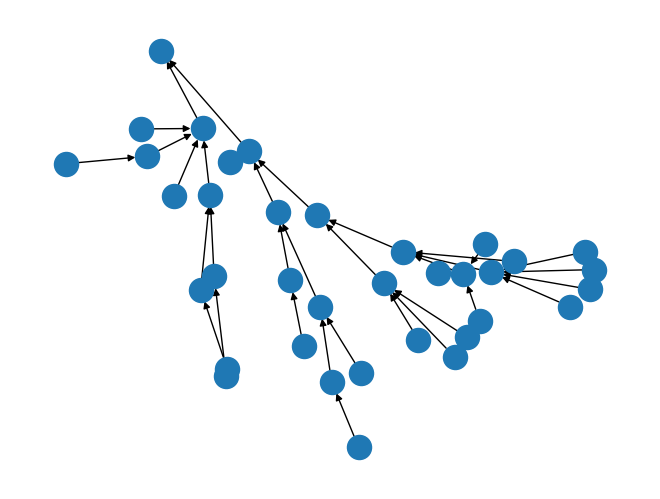

In [18]:
graph = create_core_graph(class_bindings)
nx.draw(graph)

## TEST WITH BLANKNODES

>[!WARNING]  
>
>blank node identifiers change with resetting of kernel or restarting store in general!

In [19]:
test_prop = NamedNode("http://purl.obolibrary.org/obo/BFO_0000194")
quads  = store.quads_for_pattern(test_prop, None, None, None)
for q in quads:
    print(q)

<http://purl.obolibrary.org/obo/BFO_0000194> <http://www.w3.org/2004/02/skos/core#example> "Coloured object specifically depended on by colour"@en
<http://purl.obolibrary.org/obo/BFO_0000194> <http://www.w3.org/2004/02/skos/core#definition> "b specifically depended on by c =Def c specifically depends on b"@en
<http://purl.obolibrary.org/obo/BFO_0000194> <http://www.w3.org/2004/02/skos/core#altLabel> "s-depended on by"@en
<http://purl.obolibrary.org/obo/BFO_0000194> <http://www.w3.org/2000/01/rdf-schema#label> "specifically depended on by"@en
<http://purl.obolibrary.org/obo/BFO_0000194> <http://purl.org/dc/elements/1.1/identifier> "260-BFO"
<http://purl.obolibrary.org/obo/BFO_0000194> <http://www.w3.org/2000/01/rdf-schema#range> <http://purl.obolibrary.org/obo/BFO_0000020>
<http://purl.obolibrary.org/obo/BFO_0000194> <http://www.w3.org/2000/01/rdf-schema#domain> _:a02585cc366a1a6e5cf8ae1dce217de5
<http://purl.obolibrary.org/obo/BFO_0000194> <http://www.w3.org/2002/07/owl#inverseOf> <htt

In [26]:
test_blank = BlankNode("a02585cc366a1a6e5cf8ae1dce217de5")
blank_quads = store.quads_for_pattern(test_blank, None, None, None)
for q in blank_quads:
    print(q)

_:a02585cc366a1a6e5cf8ae1dce217de5 <http://www.w3.org/2002/07/owl#unionOf> _:d9e12eac928bc93abfb7b753d5ad8f3e
_:a02585cc366a1a6e5cf8ae1dce217de5 <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://www.w3.org/2002/07/owl#Class>


In [24]:
print(list(store.quads_for_pattern(BlankNode("a02585cc366a1a6e5cf8ae1dce217de5"), None, None, None)))

[<Quad subject=<BlankNode value=a02585cc366a1a6e5cf8ae1dce217de5> predicate=<NamedNode value=http://www.w3.org/2002/07/owl#unionOf> object=<BlankNode value=d9e12eac928bc93abfb7b753d5ad8f3e> graph_name=<DefaultGraph>>, <Quad subject=<BlankNode value=a02585cc366a1a6e5cf8ae1dce217de5> predicate=<NamedNode value=http://www.w3.org/1999/02/22-rdf-syntax-ns#type> object=<NamedNode value=http://www.w3.org/2002/07/owl#Class> graph_name=<DefaultGraph>>]


In [28]:
popped = pop_blank_to_class_list(test_blank, store)
print(popped)

[<NamedNode value=http://purl.obolibrary.org/obo/BFO_0000020>, <NamedNode value=http://purl.obolibrary.org/obo/BFO_0000004>]
